In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv("weight-height.csv")
print(df.head())

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801


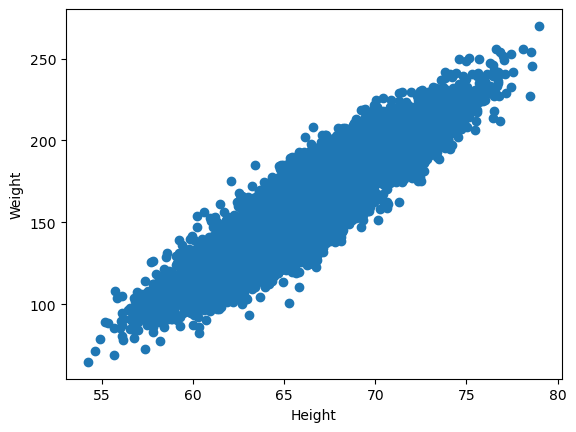

In [7]:
# Scatter plot of Height vs. Weight
plt.scatter(df["Height"], df["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [8]:
# Display information about the dataset
df.info()

# Statistical summary
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB
             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989698


In [9]:
# Check for missing values
print(df.isnull().sum())  # Correct method to check null values

# Dividing the dataset into dependent and independent variables
x = df[["Weight"]]
y = df["Height"]

print(x.shape, y.sha pe)

Height    0
Weight    0
dtype: int64
(10000, 1) (10000,)


In [10]:
# Dividing the dataset into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(7000, 1) (3000, 1)
(7000,) (3000,)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Scale test data using the same scaler

print(x_train)

[[-0.99849211]
 [ 1.02068505]
 [-0.78160369]
 ...
 [-0.1323855 ]
 [ 0.57302991]
 [-0.33289192]]


In [12]:
# dividing the dataset into dependent and indenpendent variables
x = df[["Weight"]]
y = df["Height"]

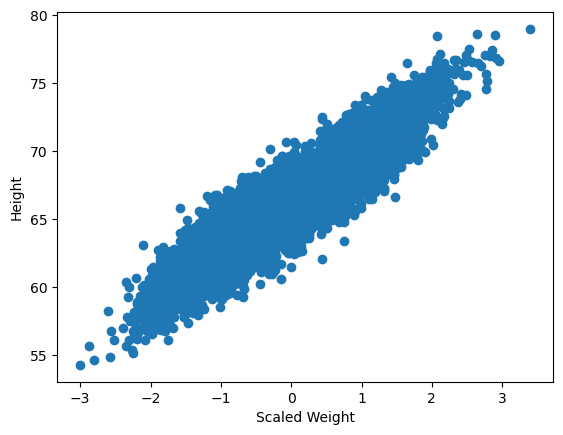

In [13]:
# Plotting the scaled training data (for visualization, usually use original)
plt.scatter(x_train, y_train)
plt.xlabel("Scaled Weight")
plt.ylabel("Height")
plt.show()

In [14]:
#dividing the dataset into train and test datasets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.30 , random_state=42)

In [15]:
# Model Training
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Training the model
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
# Model intercept and coefficient
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)

Intercept: 48.44949884063249
Coefficient: [0.11097146]


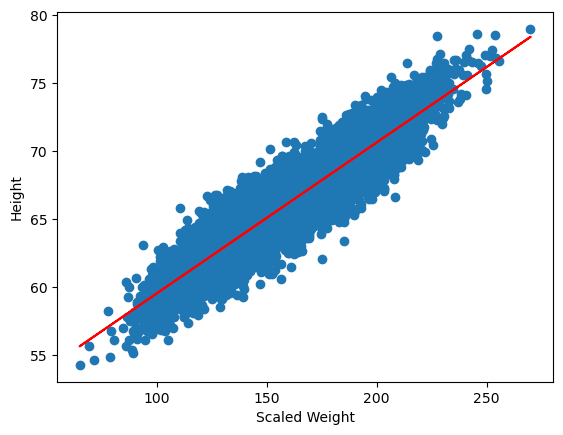

In [17]:
# Plot the regression line with scaled training data
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color="r")
plt.xlabel("Scaled Weight")
plt.ylabel("Height")
plt.show()

In [18]:
# Prediction for the test data
y_pred_test = regressor.predict(x_test)

print("Predictions on test data:", y_pred_test)

Predictions on test data: [67.66041287 70.10691508 67.33877748 ... 68.6102094  63.80591546
 69.76411368]


In [19]:
# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 2.1085956155543073
MAE: 1.1600795830404544
RMSE: 1.4521004151071328


In [21]:
# Accuracy of the model [R Square ]
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
print("R-squared score:", score)

R-squared score: 0.8577922082267299


In [24]:
# Accuracy of the model using [Adjusted R Square]

adj_r_Square_Score = (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1)
print(adj_r_Square_Score)

0.14225522599334128
